[*********************100%***********************]  1 of 1 completed


                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2004-10-05  3.353929  3.450317  3.293655  3.446332   3.437889  300887589
2004-10-06  3.425909  3.448325  3.387304  3.414203   3.405839  268900140
2004-10-07  3.410218  3.483941  3.401002  3.458287   3.449815  283643194
2004-10-08  3.455050  3.478960  3.412708  3.430392   3.421988  222442656
2004-10-11  3.412210  3.458537  3.333754  3.368873   3.360620  210437827
(5035, 6)
              Open         High          Low        Close    Adj Close  \
count  5035.000000  5035.000000  5035.000000  5035.000000  5035.000000   
mean     46.625085    47.115663    46.159044    46.644846    46.534582   
std      44.610199    45.099773    44.172577    44.638841    44.540537   
min       3.348449     3.427403     3.293655     3.368873     3.360620   
25%      13.156810    13.285079    13.026922    13.148964    13.116752   
50%      27.472075    27.674021    

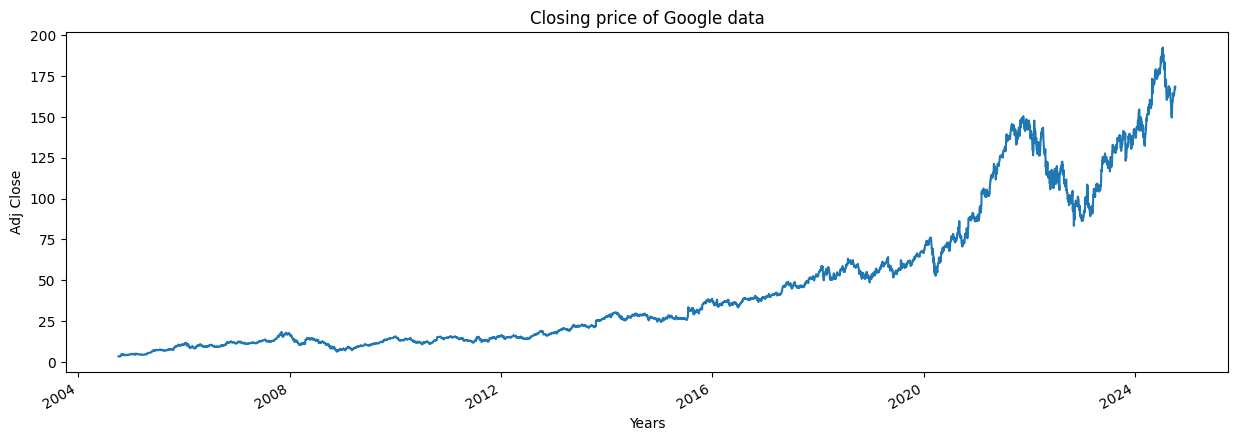

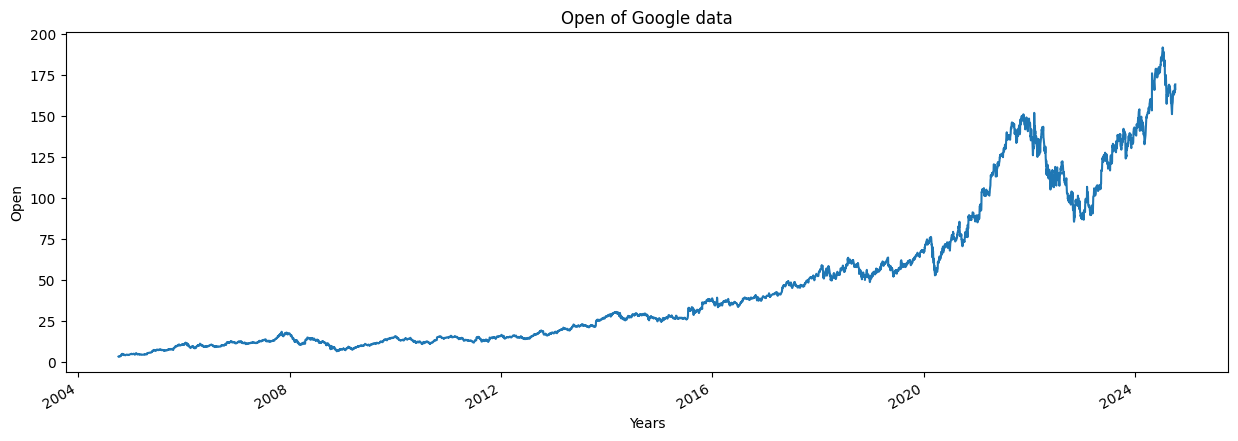

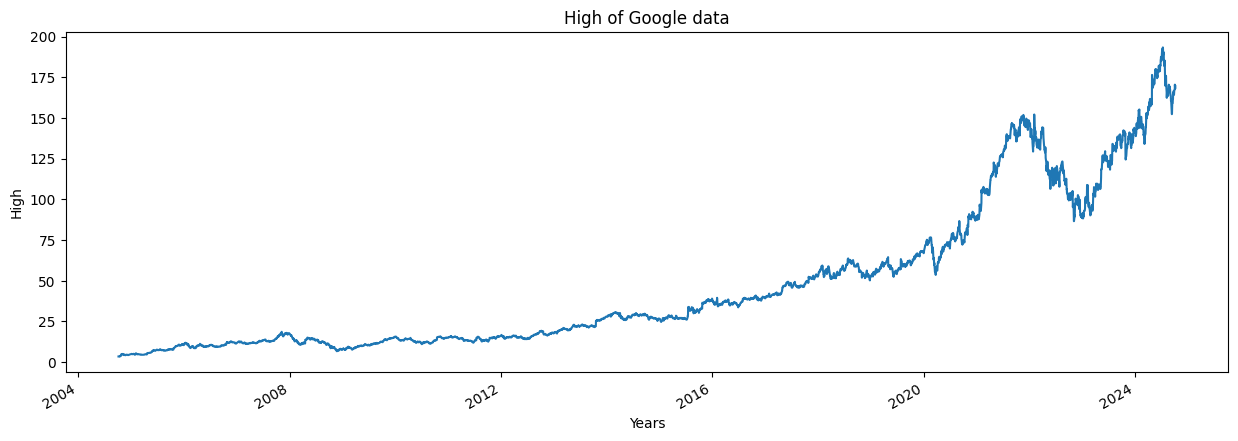

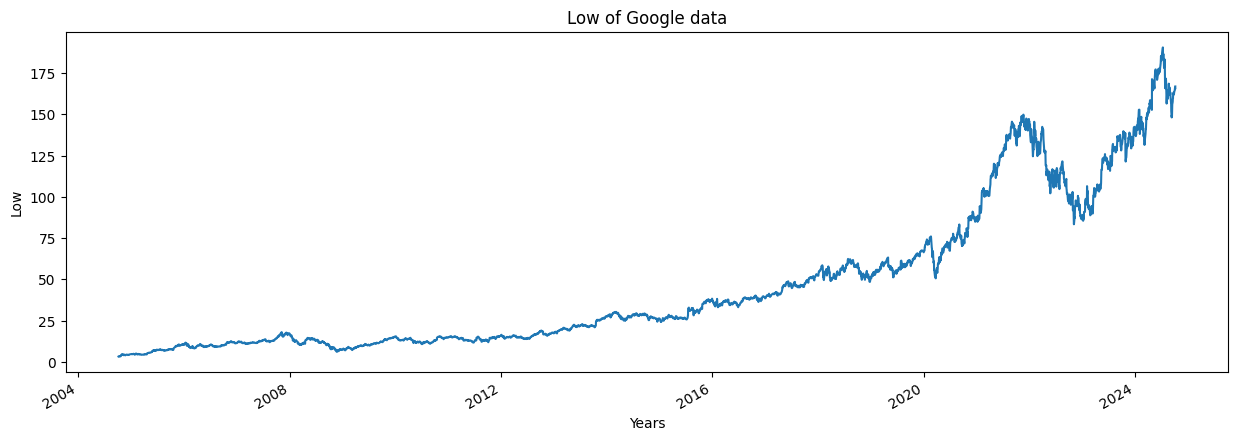

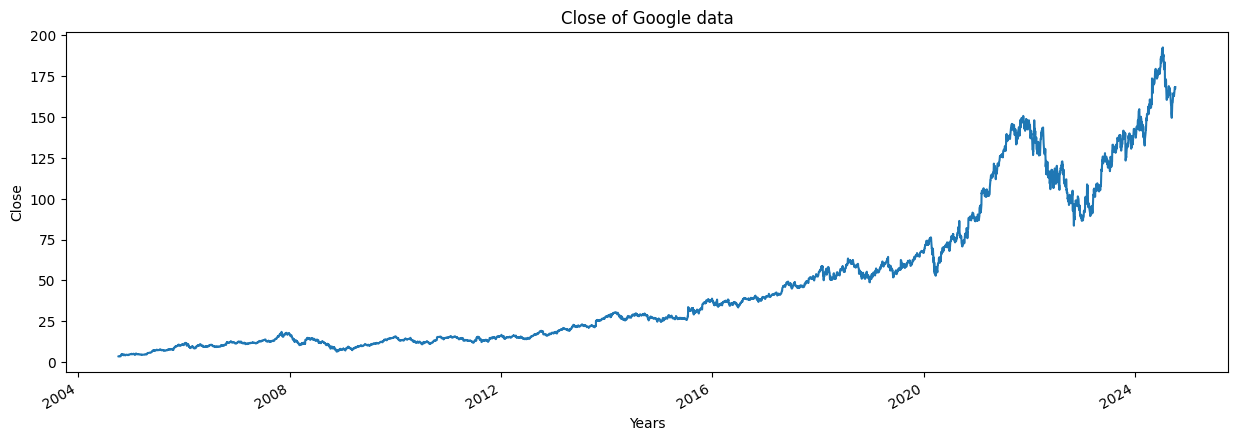

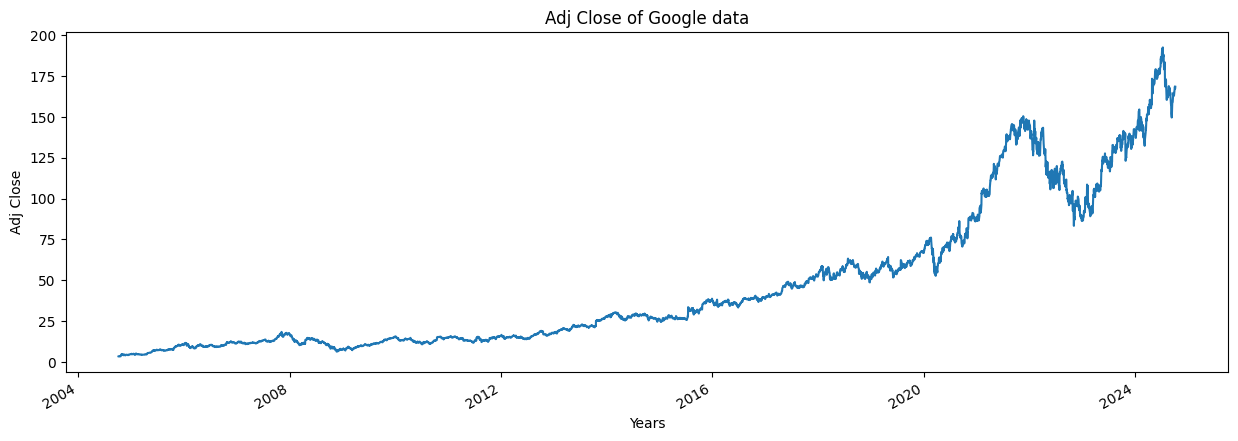

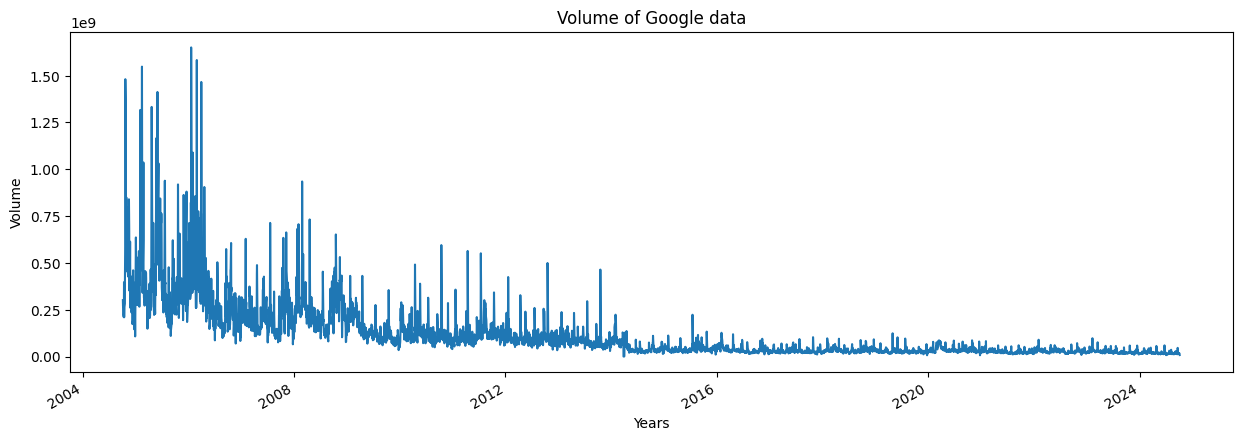

40.0
     0    MA
0   10   NaN
1   20   NaN
2   30   NaN
3   40   NaN
4   50  30.0
5   60  40.0
6   70  50.0
7   80  60.0
8   90  70.0
9  100  80.0
2004 62
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 192


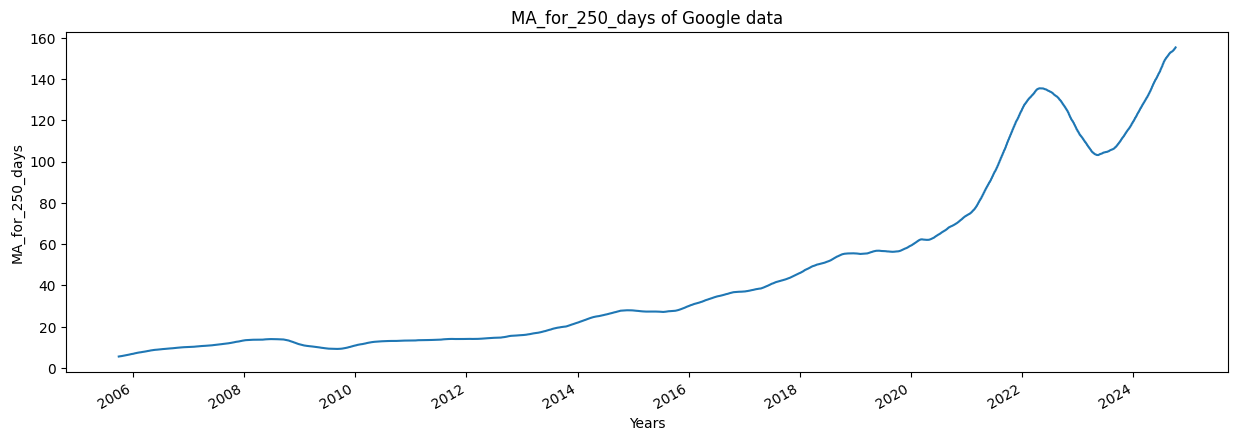

<Figure size 1500x500 with 0 Axes>

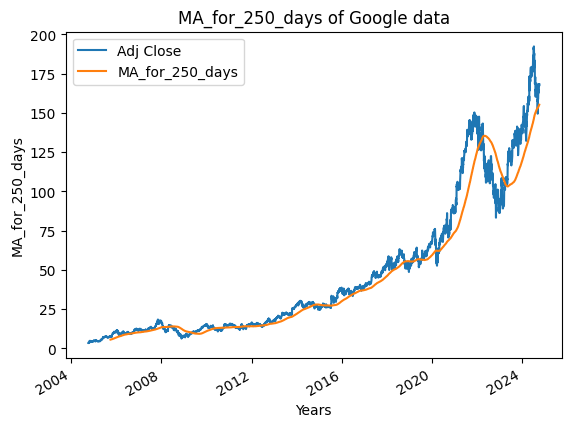

<Figure size 1500x500 with 0 Axes>

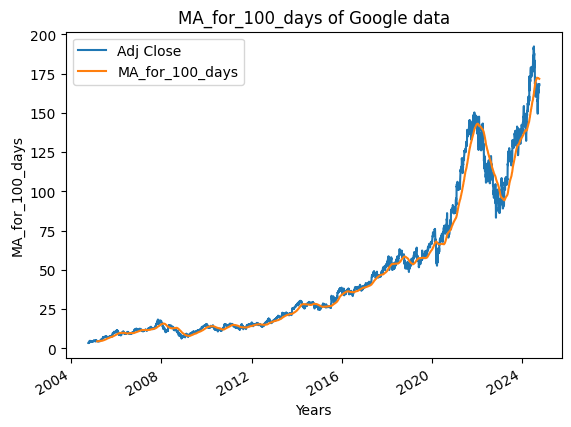

<Figure size 1500x500 with 0 Axes>

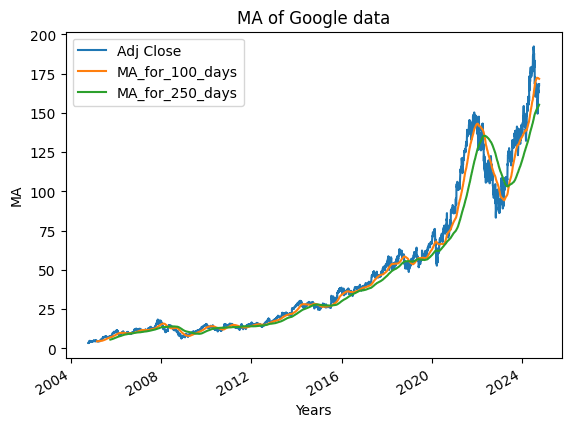

            Adj Close  percentage_change_cp
Date                                       
2004-10-05   3.437889                   NaN
2004-10-06   3.405839             -0.009323
2004-10-07   3.449815              0.012912
2004-10-08   3.421988             -0.008066
2004-10-11   3.360620             -0.017934
5035
[[0.00040873]
 [0.0002392 ]
 [0.00047182]
 [0.00032462]
 [0.        ]
 [0.00028125]
 [0.00074124]
 [0.00088581]
 [0.00116312]
 [0.00182682]
 [0.00166649]
 [0.00068736]
 [0.00185574]
 [0.00488512]
 [0.00685256]
 [0.00611658]
 [0.00666463]
 [0.00762798]
 [0.00727839]
 [0.00798677]
 [0.00783432]
 [0.00741375]
 [0.00649771]
 [0.00448032]
 [0.00490088]
 [0.0043949 ]
 [0.0042845 ]
 [0.00627692]
 [0.00614286]
 [0.00652006]
 [0.00489957]
 [0.00489431]
 [0.00424244]
 [0.00448689]
 [0.00392176]
 [0.00423981]
 [0.00519134]
 [0.00579984]
 [0.00601801]
 [0.00614024]
 [0.00587476]
 [0.00580116]
 [0.00593258]
 [0.00539242]
 [0.00475369]
 [0.00456312]
 [0.00501654]
 [0.0047826 ]
 [0.00462489]
 

C:\Users\mallikarjun meti\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 132s 37ms/step - loss: 2.9819e-04
Epoch 2/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 94s 27ms/step - loss: 4.8982e-05


In [2]:
# Importing required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Downloading Google stock data for the last 20 years
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)
stock = "GOOG"
google_data = yf.download(stock, start, end)

# Displaying the first few rows of the data
print(google_data.head())

# Checking the shape and description of the data
print(google_data.shape)
print(google_data.describe())
print(google_data.info())
print(google_data.isna().sum())

# Plotting the adjusted close price
%matplotlib inline
plt.figure(figsize=(15, 5))
google_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")
plt.show()

# Function to plot various columns
def plot_graph(figsize, values, column_name):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    plt.show()

# Plotting all columns
for column in google_data.columns:
    plot_graph((15, 5), google_data[column], column)

# Calculating moving averages
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6]) / 5)

data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data['MA'] = data.rolling(5).mean()
print(data)

# Counting the number of entries per year
for i in range(2004, 2025):
    print(i, list(google_data.index.year).count(i))

# Adding 250-day and 100-day moving averages to the data
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()

# Plotting moving averages
plot_graph((15, 5), google_data['MA_for_250_days'], 'MA_for_250_days')
plot_graph((15, 5), google_data[['Adj Close', 'MA_for_250_days']], 'MA_for_250_days')
plot_graph((15, 5), google_data[['Adj Close', 'MA_for_100_days']], 'MA_for_100_days')
plot_graph((15, 5), google_data[['Adj Close', 'MA_for_100_days', 'MA_for_250_days']], 'MA')

# Calculating percentage change
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
print(google_data[['Adj Close', 'percentage_change_cp']].head())

# Scaling the adjusted close price
Adj_close_price = google_data[['Adj Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Adj_close_price)
print(len(scaled_data))

# Preparing the data for LSTM
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
x_data, y_data = np.array(x_data), np.array(y_data)
print(x_data[0], y_data[0])

# Splitting the data into training and testing sets
splitting_len = int(len(x_data) * 0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]
x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Building the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(x_train, y_train, batch_size=1, epochs=2)
model.save("Latest_stock_price_model.keras")
